In [1]:
# Подключение необходимых библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline

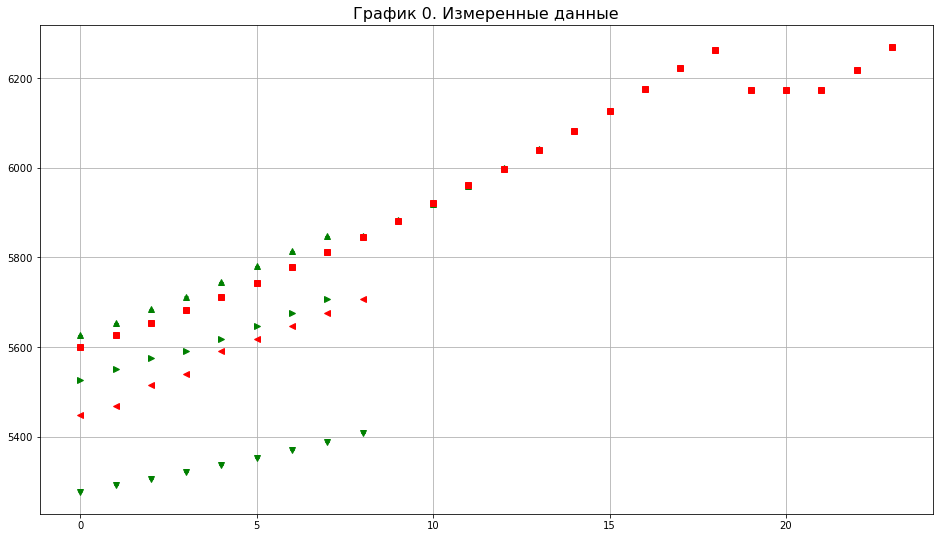

In [2]:
data_1 = pd.read_csv("Data\G1.csv", dtype = {'l':np.float64, 'dl':np.float64}, decimal = ',')
data_2 = pd.read_csv("Data\G2.csv", dtype = {'l':np.float64, 'dl':np.float64}, decimal = ',')
data_3 = pd.read_csv("Data\G3.csv", dtype = {'l':np.float64, 'dl':np.float64}, decimal = ',')
data_4 = pd.read_csv("Data\R1.csv", dtype = {'l':np.float64, 'dl':np.float64}, decimal = ',')
data_5 = pd.read_csv("Data\R2.csv", dtype = {'l':np.float64, 'dl':np.float64}, decimal = ',')

x_1 = np.array([i for i in range(len(data_1['l']))])
x_2 = np.array([i for i in range(len(data_2['l']))])
x_3 = np.array([i for i in range(len(data_3['l']))])
x_4 = np.array([i for i in range(len(data_4['l']))])
x_5 = np.array([i for i in range(len(data_5['l']))])

fig, ax = plt.subplots(1, 1, figsize = (16, 9))
ax.grid(visible=1, which='both', axis='both')
ax.set_title("График 0. Измеренные данные", fontsize = 16)
ax.errorbar(x_1, data_1['l'], yerr = data_1['dl'], fmt="^g", elinewidth=1.0, capsize = 2)
ax.errorbar(x_2, data_2['l'], yerr = data_2['dl'], fmt="vg", elinewidth=1.0, capsize = 2)
ax.errorbar(x_3, data_3['l'], yerr = data_3['dl'], fmt=">g", elinewidth=1.0, capsize = 2)
ax.errorbar(x_4, data_4['l'], yerr = data_4['dl'], fmt="<r", elinewidth=1.0, capsize = 2)
ax.errorbar(x_5, data_5['l'], yerr = data_5['dl'], fmt="sr", elinewidth=1.0, capsize = 2)

plt.show()

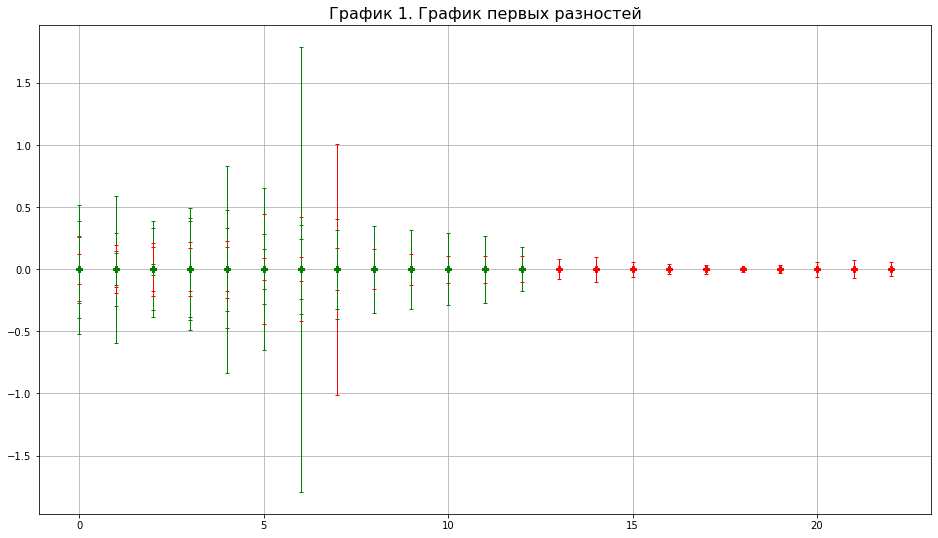

In [4]:
def toE(lmbd):
    h = 6.63
    c = 3
    eV = 1.6
    return (h*c) / (eV * lmbd) * 1e-3

E_G1 = toE(data_2['l']); dE_G1 = toE(data_2['dl'])
E_R1 = toE(data_4['l']); dE_R1 = toE(data_4['dl'])
E_G2 = toE(data_3['l']); dE_G2 = toE(data_3['dl'])
E_R2 = toE(data_5['l']); dE_R2 = toE(data_5['dl'])
E_G3 = toE(data_1['l']); dE_G3 = toE(data_1['dl'])

data_E_1 = np.array([E_G1[i] - E_G1[i+1] for i in range(len(E_G1) - 1)])
data_dE_1 = np.array([dE_G1[i] + dE_G1[i+1] for i in range(len(dE_G1) - 1)])
data_E_2 = np.array([E_R1[i] - E_R1[i+1] for i in range(len(E_R1) - 1)])
data_dE_2 = np.array([dE_R1[i] + dE_R1[i+1] for i in range(len(dE_R1) - 1)])
data_E_3 = np.array([E_G2[i] - E_G2[i+1] for i in range(len(E_G2) - 1)])
data_dE_3 = np.array([dE_G2[i] + dE_G2[i+1] for i in range(len(dE_G2) - 1)])
data_E_4 = np.array([E_R2[i] - E_R2[i+1] for i in range(len(E_R2) - 1)])
data_dE_4 = np.array([dE_R2[i] + dE_R2[i+1] for i in range(len(dE_R2) - 1)])
data_E_5 = np.array([E_G3[i] - E_G3[i+1] for i in range(len(E_G3) - 1)])
data_dE_5 = np.array([dE_G3[i] + dE_G3[i+1] for i in range(len(dE_G3) - 1)])

x_1 = np.array([i for i in range(len(data_E_1))])
x_2 = np.array([i for i in range(len(data_E_2))])
x_3 = np.array([i for i in range(len(data_E_3))])
x_4 = np.array([i for i in range(len(data_E_4))])
x_5 = np.array([i for i in range(len(data_E_5))])

fig, ax = plt.subplots(1, 1, figsize = (16, 9))
ax.grid(visible=1, which='both', axis='both')
ax.set_title("График 1. График первых разностей", fontsize = 16)
ax.errorbar(x_1, data_E_1, yerr = data_dE_1, fmt="Pg", elinewidth=1.0, capsize = 2)
ax.errorbar(x_2, data_E_2, yerr = data_dE_2, fmt="Pr", elinewidth=1.0, capsize = 2)
ax.errorbar(x_3, data_E_3, yerr = data_dE_3, fmt="Pg", elinewidth=1.0, capsize = 2)
ax.errorbar(x_4, data_E_4, yerr = data_dE_4, fmt="Pr", elinewidth=1.0, capsize = 2)
ax.errorbar(x_5, data_E_5, yerr = data_dE_5, fmt="Pg", elinewidth=1.0, capsize = 2)

plt.show()